#Tutorial Sentiment Analysis
Pengajar :
1. Aris Budi Santoso
2. Prabu Kresna Putra

Tutorial ini merupakan panduan dalam melakukan sentiment analysis.

Data yang digunakan dalam sesi praktikum ini merupakan data yang telah berlabel dalam format csv yang telah digunakan dalam penelitian yang dilakukan oleh Simanungkalit, Tiarma dalam Tugas Mata Kuliah Analitika Media Sosial dan Digital dengan Tema Sentimen Analisis atas Kebijakan PPKM pada Program MTI Universitas Indonesia.

## 1. Persiapan

Install dan import library yang dibutuhkan

### Install Library

In [ ]:
!pip install nlp-id

     |████████████████████████████████| 7.9 MB 5.1 MB/s 
     |████████████████████████████████| 7.0 MB 19.3 MB/s 
     |████████████████████████████████| 1.5 MB 37.4 MB/s 
  Created wheel for nlp-id: filename=nlp_id-0.1.12.0-py3-none-any.whl size=8074104 sha256=5dfa4376bbdaadb1ff644910d603722063abc65908e2e5839cbee49cd02a92f1
  Stored in directory: /root/.cache/pip/wheels/b2/50/48/da59531125bd94f48dfe66140f41d8fd8a4f04062050375013
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449925 sha256=536993797d913dc3ee14d5262d9d4e4c7be93af850976f8ee1256aebc7e005b4
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=7dc145dbf0dd8e5a5af08bcec33c52833bf48cdd5a4b87f02b5ed5372356599b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built nlp-id nltk wget
  Attempting uninstall: 

In [ ]:
!pip install emoji

     |████████████████████████████████| 175 kB 3.7 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=06d61a490e738abeb372cd62abae75d5665d415967ad0857f44a6c6412b8cb67
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


### Import Library

In [ ]:
# Library untuk akses Google Drive dari Colabs
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Library NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
#nltk.download('stopwords')
from nlp_id.stopword import StopWord
from nlp_id.postag import PosTag
from nlp_id.lemmatizer import Lemmatizer 

# Library Preprocessing
import pandas as pd
import re
import csv
import random
import string
import emoji
import operator
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Library untuk Melatih dan Evaluasi Model
from sklearn.model_selection import train_test_split
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from nltk.classify import ClassifierI
from statistics import mode
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

### Load Data

In [ ]:
import csv

In [ ]:
with open('/content/gdrive/My Drive/PRAKTIKUM_AMSD/dataset/dataset-sentimen.csv', 'r', encoding="utf8") as nodecsv: # Buka file                       
    csvreader = csv.reader(nodecsv) # membaca data
    # Menyusun data dalam list dan menghilangkan header data
    datacsv = [n for n in csvreader][1:]

In [ ]:
print(datacsv[:10])

[['1.47E+18', 'positive', 'Tue Nov 30 00:00:14 +0000 2021', '31', 'RT @HanifahAndini96: Jakarta blm bebas pandemi meski masuk kategori PPKM Level 1. Kondisi Natal n tahun baru 2022 serta penurunan level DKI…'], ['1.47E+18', 'positive', 'Tue Nov 30 00:01:39 +0000 2021', '0', 'Status PPKM DKI Jakarta Naik ke Level 2 https://t.co/VHC8wZewEr'], ['1.47E+18', 'negative', 'Tue Nov 30 00:01:40 +0000 2021', '0', 'Org² kaya lu nih yg bikin ppkm suka diperpanjang. Parno kebodohan pala Lo, liat berapa banyak org yg udah meninggal gara² nih virus. Kmrin² bukan perkara sepele njir. Vaksin gak ngejamin lo ga kena, bangga bgt Lo ngomong gini?? https://t.co/3ebS0mDThN https://t.co/YjWYcQhUXY'], ['1.47E+18', 'negative', 'Tue Nov 30 00:01:41 +0000 2021', '1549', 'RT @msaid_didu: Sangat lucu alasan mewajibkan PCR utk hambat mobilisasi. Wajibkan PCR jelas utk : 1) memaksa rakyat membeli produk pengusah…'], ['1.47E+18', 'positive', 'Tue Nov 30 00:02:34 +0000 2021', '7', 'RT @Bisniscom: Kasus Covid-19 Rendah

### Tokenisasi

#### Regex untuk tokenisasi

In [ ]:
import re

In [ ]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
regex_str = []
regex_str.append(emoticons_str)
regex_str.append(r'<[^>]+>')# HTML tags
regex_str.append(r'(?:@[\w_]+)')# @-mentions
regex_str.append(r'(?:&[\w_]+)')
regex_str.append(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)") # hash-tags
regex_str.append(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+') # URLs
regex_str.append(r'(?:(?:\d+,?)+(?:\.?\d+)?)') # numbers
regex_str.append(r"(?:[a-z][a-z'\-_]+[a-z])") # words with - and '
regex_str.append(r'(?:[\w_]+)') # other words
regex_str.append(r'(?:\S)') # anything else

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

In [ ]:
def tokenize(s):
    tokens = tokens_re.findall(s)
    return tokens

In [ ]:
tokens = []
for c in datacsv:
    tokens.append(tokenize(c[4]))

print(tokens[:5])

[['RT', '@HanifahAndini96', ':', 'Jakarta', 'blm', 'bebas', 'pandemi', 'meski', 'masuk', 'kategori', 'PPKM', 'Level', '1', '.', 'Kondisi', 'Natal', 'n', 'tahun', 'baru', '2022', 'serta', 'penurunan', 'level', 'DKI', '…'], ['Status', 'PPKM', 'DKI', 'Jakarta', 'Naik', 'ke', 'Level', '2', 'https://t.co/VHC8wZewEr'], ['Org', '²', 'kaya', 'lu', 'nih', 'yg', 'bikin', 'ppkm', 'suka', 'diperpanjang', '.', 'Parno', 'kebodohan', 'pala', 'Lo', ',', 'liat', 'berapa', 'banyak', 'org', 'yg', 'udah', 'meninggal', 'gara', '²', 'nih', 'virus', '.', 'Kmrin', '²', 'bukan', 'perkara', 'sepele', 'njir', '.', 'Vaksin', 'gak', 'ngejamin', 'lo', 'ga', 'kena', ',', 'bangga', 'bgt', 'Lo', 'ngomong', 'gini', '?', '?', 'https://t.co/3ebS0mDThN', 'https://t.co/YjWYcQhUXY'], ['RT', '@msaid_didu', ':', 'Sangat', 'lucu', 'alasan', 'mewajibkan', 'PCR', 'utk', 'hambat', 'mobilisasi', '.', 'Wajibkan', 'PCR', 'jelas', 'utk', ':', '1', ')', 'memaksa', 'rakyat', 'membeli', 'produk', 'pengusah', '…'], ['RT', '@Bisniscom', '

#### Stop Word Removal

In [ ]:
stopword = StopWord() 

In [ ]:
punctuation = list(string.punctuation)
stop = stopword.get_stopword() + punctuation + ['rt', 'via', '…','•','“']

In [ ]:
# Fungsi untuk melakukan stop word removal
def cleanTweet(token,regex):
    terms_all = [emoji.demojize(term) for term in token if term.lower() not in stop and not regex.match(term)]
    return terms_all

In [ ]:
exclude_str = []
exclude_str.append(emoticons_str)
exclude_str.append(r'<[^>]+>')# HTML tags
exclude_str.append(r'(?:@[\w_]+)')# @-mentions
exclude_str.append(r'(?:&[\w_]+)')
exclude_str.append(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)") # hash-tags
exclude_str.append(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+') # URLs
exclude_str.append(r'(?:(?:\d+,?)+(?:\.?\d+)?)') # numbers
exclude_str.append(r'(\b[a-zA-Z0-9]{2,3}\b)') # numbers

exclude_re = re.compile(r'('+'|'.join(exclude_str)+')', re.VERBOSE | re.IGNORECASE)

In [ ]:
# Menghitung frekwensi kata
all_word=[]
from collections import Counter
count_all = Counter()
for token in tokens:
    cleanToken = cleanTweet(token,exclude_re)
    terms_all = [term.lower() for term in cleanToken]
    count_all.update(terms_all)
    for w in terms_all:
        all_word.append(w)
print(count_all.most_common(100))

[('ppkm', 414), ('level', 139), ('covid', 101), ('dukung', 85), ('jalan', 82), ('keselamatan', 79), ('rangka', 70), ('kampanye', 66), ('subang', 64), ('pembagian', 60), ('giat', 58), ('prokes', 52), ('nggak', 51), ('pemerintah', 50), ('mendukung', 45), ('masker', 44), ('kebijakan', 39), ('pengguna', 35), ('vaksinasi', 33), ('masyarakat', 31), ('libur', 30), ('kalo', 29), ('pandemi', 28), ('otista', 28), ('setuju', 27), ('lonjakan', 26), ('penerapan', 24), ('lintas', 24), ('penanganan', 24), ('natal', 23), ('anak', 23), ('aturan', 23), ('desember', 22), ('menerapkan', 22), ('upaya', 22), ('penuh', 21), ('kasih', 21), ('k', 20), ('lawan', 20), (':loudly_crying_face:', 19), ('tertib', 18), ('sepeda', 18), ('motor', 18), ('bersatu', 18), ('menghalau', 18), ('helm', 17), ('indonesia', 17), ('tutup', 17), ('omicron', 17), ('seneng', 15), ('mencegah', 15), ('kebodohan', 14), ('nataru', 14), ('gila', 14), ('snack', 14), ('gratis', 14), ('dibonceng', 14), ('orang', 13), ('gelombang', 13), ('kes

In [ ]:
len(all_word)

4802

#### Lemmatisasi (Mengambil kata dasar)

In [ ]:
lemmatizer = Lemmatizer()

In [ ]:
all_stmword = [lemmatizer.lemmatize(w) for w in all_word]

In [ ]:
print(all_stmword[:100])

['jakarta', 'bebas', 'pandemi', 'masuk', 'kategori', 'ppkm', 'level', 'kondisi', 'natal', 'n', 'turun', 'level', 'status', 'ppkm', 'jakarta', 'level', '', 'kaya', 'bikin', 'ppkm', 'suka', 'panjang', 'parno', 'bodoh', 'pala', 'liat', 'tinggal', 'gara', '', 'virus', 'kmrin', '', 'perkara', 'sepele', 'njir', 'vaksin', 'ngejamin', 'kena', 'bangga', 'ngomong', 'gin', 'lucu', 'alas', 'wajib', 'hambat', 'mobilisasi', 'wajib', 'paksa', 'rakyat', 'beli', 'produk', 'usah', 'covid', 'rendah', 'alas', 'perintah', 'panjang', 'ppkm', 'jawa-bali', 'desember', 'status', 'ppkm', 'jakarta', 'level', 'sorry', 'pake', 'pake', 'masker', 'biasa', 'pantes', 'ppkm', 'indo', 'habis', '', 'wong', 'masyarakat', 'gin', 'gamau', 'pake', 'masker', 'gamau', 'ppkm', 'puncak', 'komedi', 'aduhh', 'ppkm', 'wagub', 'jakarta', 'ahmad', 'riza', 'patria', 'timbang', 'rencana', 'reuni', 'jakarta', 'covid', 'rendah', 'alas', 'perintah', 'panjang']


In [ ]:
print(lemmatizer.lemmatize('menyejukan'))

sejuk


In [ ]:
len(all_stmword)

4802

#### POS Tagging

In [ ]:
postagger = PosTag() 

No model removed


/usr/local/lib/python3.7/dist-packages/nlp_id/postag.py:39: UserWarning: Downloading model ..
  warnings.warn("Downloading model ..")


In [ ]:
pos = [postagger.get_pos_tag(w)[0] for w in all_stmword if len(postagger.get_pos_tag(w))>0]

In [ ]:
print(pos[:10])

[('jakarta', 'NNP'), ('bebas', 'JJ'), ('pandemi', 'VB'), ('masuk', 'VB'), ('kategori', 'NN'), ('ppkm', 'NN'), ('level', 'NN'), ('kondisi', 'NN'), ('natal', 'NN'), ('n', 'NN')]


In [ ]:
allowed_word_types = ["ADV","JJ","ADJP","VB"]
allowed_words=[w[0] for w in pos if w[1] in allowed_word_types]

In [ ]:
print(allowed_words[:100])

['bebas', 'pandemi', 'masuk', 'turun', 'kaya', 'bikin', 'suka', 'panjang', 'liat', 'tinggal', 'sepele', 'kena', 'bangga', 'ngomong', 'lucu', 'wajib', 'wajib', 'paksa', 'beli', 'usah', 'rendah', 'panjang', 'jawa-bali', 'biasa', 'habis', 'rendah', 'panjang', 'jawa-bali', 'bebas', 'pandemi', 'masuk', 'turun', 'bebas', 'pandemi', 'masuk', 'turun', 'jawa-bali', 'panjang', 'tertib', 'tuju', 'biar', 'rendah', 'panjang', 'jawa-bali', 'turun', 'tenang', 'aman', 'nikah', 'sederhana', 'dekat', 'dianjurinnya', 'sederhana', 'tentu', 'dukung', 'keras', 'umum', 'bijak', 'super', 'ketat', 'bilang', 'bilang', 'bilang', 'sampe', 'terima', 'turun', 'tenang', 'aman', 'turun', 'tenang', 'aman', 'turun', 'tenang', 'aman', 'muktamar', 'optimal', 'dukung', 'terap', 'selamat', 'selamat', 'selamat', 'selamat', 'selamat', 'selamat', 'selamat', 'selamat', 'selamat', 'selamat', 'tertib', 'main', 'selamat', 'tertib', 'main', 'selamat', 'selamat', 'selamat', 'selamat', 'selamat', 'selamat', 'selamat', 'selamat']


In [ ]:
len(allowed_words)

1168

### Bag of Words

#### Frekwensi Kemunculan Kata

In [ ]:
#Menyusun distribusi kata berdasarkan kemunculannya
allwords = nltk.FreqDist(allowed_words)

#Mengambil 1000 pertama dari distribusi kata berdasarkan frekwensi kemunculannya 
tuple_features = list(allwords.most_common())[:1000]
word_features = [k for (k,v) in tuple_features]
#Memeriksa word_features
print(word_features[:100])

['dukung', 'selamat', 'terap', 'bijak', 'tuju', 'pandemi', 'atur', 'panjang', 'penuh', 'lawan', 'tertib', 'tutup', 'ketat', 'gila', 'gratis', 'masuk', 'sehat', 'turun', 'tuslah', 'biar', 'main', 'bagus', 'jaga', 'aman', 'butuh', 'cepat', 'sukses', 'januari', 'cuti', 'sampe', 'salah', 'nasional', 'tetep', 'bikin', 'kena', 'jawa-bali', 'pulih', 'jelang', 'takut', 'beaming', 'enak', 'sedih', 'mari', 'bebas', 'liat', 'tenang', 'bilang', 'muktamar', 'coba', 'kendali', 'tekan', 'pergi', 'kuat', 'polri', 'patroli', 'tetap', 'kaya', 'beli', 'rendah', 'optimal', 'putus', 'mulu', 'ajak', 'resmi', 'nongki', 'tahan', 'trus', 'pulang', 'bener', 'misuh', 'mending', 'tunai', 'jenuh', 'darurat', 'sumpah', 'makan', 'masak', 'senang', 'alami', 'terminal', 'transit', 'sesuai', 'ungkap', 'besar', 'sekitar', 'menghimbau', 'rilis', 'suka', 'tinggal', 'ngomong', 'wajib', 'habis', 'sederhana', 'satlantas', 'berlalulintas', 'mudah', 'cari', 'sambut', 'ambil', 'asli']


In [ ]:
tuple_features

[('dukung', 142),
 ('selamat', 80),
 ('terap', 48),
 ('bijak', 39),
 ('tuju', 29),
 ('pandemi', 28),
 ('atur', 27),
 ('panjang', 24),
 ('penuh', 21),
 ('lawan', 21),
 ('tertib', 18),
 ('tutup', 17),
 ('ketat', 15),
 ('gila', 15),
 ('gratis', 14),
 ('masuk', 12),
 ('sehat', 12),
 ('turun', 11),
 ('tuslah', 11),
 ('biar', 10),
 ('main', 10),
 ('bagus', 9),
 ('jaga', 9),
 ('aman', 8),
 ('butuh', 8),
 ('cepat', 8),
 ('sukses', 7),
 ('januari', 7),
 ('cuti', 7),
 ('sampe', 6),
 ('salah', 6),
 ('nasional', 6),
 ('tetep', 6),
 ('bikin', 5),
 ('kena', 5),
 ('jawa-bali', 5),
 ('pulih', 5),
 ('jelang', 5),
 ('takut', 5),
 ('beaming', 5),
 ('enak', 5),
 ('sedih', 5),
 ('mari', 5),
 ('bebas', 4),
 ('liat', 4),
 ('tenang', 4),
 ('bilang', 4),
 ('muktamar', 4),
 ('coba', 4),
 ('kendali', 4),
 ('tekan', 4),
 ('pergi', 4),
 ('kuat', 4),
 ('polri', 4),
 ('patroli', 4),
 ('tetap', 4),
 ('kaya', 3),
 ('beli', 3),
 ('rendah', 3),
 ('optimal', 3),
 ('putus', 3),
 ('mulu', 3),
 ('ajak', 3),
 ('resmi', 3),
 

#### Membentuk Featureset

In [ ]:
# Membentuk list dokumen dan labelnya
document=[]
for w in datacsv:
  document.append((w[4],w[1]))

In [ ]:
# Fungsi untuk membentuk bag of words
def find_features(document):
    words = tokenize(document)
    words = cleanTweet(words,exclude_re)
    words = [lemmatizer.lemmatize(w) for w in words]
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

In [ ]:
nltk.download('punkt')
featuresets = [(find_features(rev), category) for (rev, category) in document]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(featuresets[3])

({'dukung': False, 'selamat': False, 'terap': False, 'bijak': False, 'tuju': False, 'pandemi': False, 'atur': False, 'panjang': False, 'penuh': False, 'lawan': False, 'tertib': False, 'tutup': False, 'ketat': False, 'gila': False, 'gratis': False, 'masuk': False, 'sehat': False, 'turun': False, 'tuslah': False, 'biar': False, 'main': False, 'bagus': False, 'jaga': False, 'aman': False, 'butuh': False, 'cepat': False, 'sukses': False, 'januari': False, 'cuti': False, 'sampe': False, 'salah': False, 'nasional': False, 'tetep': False, 'bikin': False, 'kena': False, 'jawa-bali': False, 'pulih': False, 'jelang': False, 'takut': False, 'beaming': False, 'enak': False, 'sedih': False, 'mari': False, 'bebas': False, 'liat': False, 'tenang': False, 'bilang': False, 'muktamar': False, 'coba': False, 'kendali': False, 'tekan': False, 'pergi': False, 'kuat': False, 'polri': False, 'patroli': False, 'tetap': False, 'kaya': False, 'beli': True, 'rendah': False, 'optimal': False, 'putus': False, 'mul

### Distribusi Dataset

In [ ]:
lsclass = [category for (rev, category) in document]
df_alltrain = pd.DataFrame(lsclass, columns=['class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


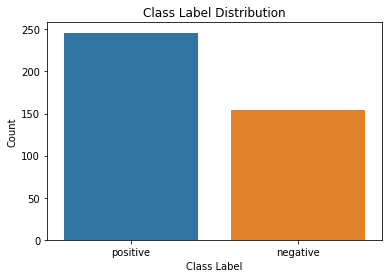

Jumlah baris kelas positif:  246
Jumlah baris kelas negatif:  154


In [ ]:
sns.barplot(df_alltrain['class'].unique(),df_alltrain['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('Jumlah baris kelas positif: ',df_alltrain['class'].value_counts()['positive'])
print('Jumlah baris kelas negatif: ',df_alltrain['class'].value_counts()['negative'])

### Membagi Data Training dan Testing

In [ ]:
# menyusun data training dan testing 
trainsize = round(len(featuresets)*0.7)

random.shuffle(featuresets)
training_set = featuresets[:trainsize]
testing_set = featuresets[trainsize:]


In [ ]:
len(testing_set)

120

### Melatih Model Klasifikasi dengan Library NLTK

#### Naive Bayes

##### Melatih Model

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(25)

Classifier accuracy percent: 79.16666666666666
Most Informative Features
                 selamat = True           positi : negati =     23.0 : 1.0
                   tutup = True           negati : positi =     13.5 : 1.0
                  dukung = True           positi : negati =     11.4 : 1.0
                 pandemi = True           positi : negati =      9.1 : 1.0
                   terap = True           positi : negati =      8.7 : 1.0
                   penuh = True           positi : negati =      6.9 : 1.0
                   butuh = True           negati : positi =      6.5 : 1.0
                  tertib = True           positi : negati =      5.1 : 1.0
                    biar = True           negati : positi =      4.5 : 1.0
                   sampe = True           negati : positi =      4.5 : 1.0
                    tuju = True           negati : positi =      3.7 : 1.0
                    main = True           negati : positi =      3.5 : 1.0
                   bijak = 

##### Mengukur kinerja model

In [ ]:
from nltk.metrics.scores import (precision, recall)
import collections

refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(testing_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

print('Recall:', recall(refsets['positive'], testsets['positive']))
print('Precision:', precision(refsets['positive'], testsets['positive']))

Recall: 0.9102564102564102
Precision: 0.797752808988764


In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False, random_state=None)

In [ ]:
k=1
for traincv, testcv in cv.split(featuresets):
    training_sets = featuresets[traincv[0]:traincv[len(traincv)-1]]
    testing_sets = featuresets[testcv[0]:testcv[len(testcv)-1]]
    classifier = nltk.NaiveBayesClassifier.train(featuresets[traincv[0]:traincv[len(traincv)-1]])
    refsets = collections.defaultdict(set)
    testsets = collections.defaultdict(set)
 
    for i, (feats, label) in enumerate(testing_sets):
        refsets[label].add(i)
        observed = classifier.classify(feats)
        testsets[observed].add(i)
    print ("Fold - "+str(k))
    print("Accuracy:",(nltk.classify.accuracy(classifier, testing_sets))*100)
    print('Recall:', recall(refsets['positive'], testsets['positive'])*100)
    print('Precision:', precision(refsets['positive'], testsets['positive'])*100)
    k+=1

Fold - 1
Accuracy: 84.81012658227847
Recall: 87.2340425531915
Precision: 87.2340425531915
Fold - 2
Accuracy: 87.34177215189874
Recall: 93.87755102040816
Precision: 86.79245283018868
Fold - 3
Accuracy: 89.87341772151899
Recall: 97.82608695652173
Precision: 86.53846153846155
Fold - 4
Accuracy: 89.87341772151899
Recall: 97.77777777777777
Precision: 86.27450980392157
Fold - 5
Accuracy: 81.0126582278481
Recall: 87.27272727272727
Precision: 85.71428571428571


##### Menyimpan model ke dalam bentuk file

In [ ]:
#menyimpan model yang telah ditrainning ke file sav
filename = '/content/gdrive/My Drive/PRAKTIKUM_AMSD/model/ppkm_nb_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
#load model classifier nb dari file
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#melakukan prediksi data menggunakan model classifier nb yang telah diload
lsPrediksi = []
for (rev, category) in document[trainsize:]:
    result=loaded_model.classify(find_features(rev))
    lsPrediksi.append([rev, result, category])

In [ ]:
print(lsPrediksi[:10])

[['@zafran_gema Dukung perpanjangan PPKM level 3', 'positive', 'positive'], ['@Anggita_lung @jokowi Dukung PPKM', 'positive', 'positive'], ['@Penyair_Berdiri Dukung PPKM', 'positive', 'positive'], ['RT @forjakeu: Kita harus mendukung penuh upaya pemerintah dalam penanganan Pandemi Covid-19 dengan menerapkan PPKM level 3.  Jangan kasih k…', 'positive', 'positive'], ['@chinta_chintata Dukung PPKM level 3', 'positive', 'positive'], ['@p4rwaty_rizky Dukung PPKM level 3', 'positive', 'positive'], ['@Widyarenee_ Dukung PPKM level 3', 'positive', 'positive'], ['RT @forjakeu: Kita harus mendukung penuh upaya pemerintah dalam penanganan Pandemi Covid-19 dengan menerapkan PPKM level 3.  Jangan kasih k…', 'positive', 'positive'], ['@p4rwaty_rizky Dukung PPKM level 3 💪💪', 'positive', 'positive'], ['Bersatu Lawan Covid!!!  Penerapan aturan PPKM Level 3 menjadi kebijakan tepat untuk menghalau Lonjakan Cov19.  Dukung!!! https://t.co/77DAZf3MqG', 'positive', 'positive']]


In [ ]:
act=[]
pred=[]

for i, (feats, label) in enumerate(testing_set):
    observed = classifier.classify(feats)
    act.append(label)
    pred.append(observed)

##### Confusion Matrix

In [ ]:
from nltk.metrics import ConfusionMatrix

In [ ]:
matrix = ConfusionMatrix(act,pred)

In [ ]:
print(matrix)

         |  n  p |
         |  e  o |
         |  g  s |
         |  a  i |
         |  t  t |
         |  i  i |
         |  v  v |
         |  e  e |
---------+-------+
negative |<29>13 |
positive |  7<71>|
---------+-------+
(row = reference; col = test)



#### Support Vector Machine

In [ ]:
classifier2 = nltk.classify.SklearnClassifier(LinearSVC())
classifier2.train(training_set)

<SklearnClassifier(LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))>

In [ ]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier2, testing_set))*100)

Classifier accuracy percent: 86.66666666666667


#### Decision Tree

In [ ]:
classifier3 = nltk.classify.SklearnClassifier(DecisionTreeClassifier())
classifier3.train(training_set)

<SklearnClassifier(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'))>

In [ ]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier3, testing_set))*100)

Classifier accuracy percent: 87.5


#### AdaBoost


In [ ]:
classifier4 = nltk.classify.SklearnClassifier(AdaBoostClassifier())
classifier4.train(training_set)

<SklearnClassifier(AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None))>

In [ ]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier4, testing_set))*100)

Classifier accuracy percent: 86.66666666666667


#### Random Forest


In [ ]:
classifier5 = nltk.classify.SklearnClassifier(RandomForestClassifier())
classifier5.train(training_set)

<SklearnClassifier(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))>

In [ ]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier5, testing_set))*100)

Classifier accuracy percent: 87.5


#### Gradient Boosting

In [ ]:
classifier6 = nltk.classify.SklearnClassifier(GradientBoostingClassifier())
classifier6.train(training_set)

<SklearnClassifier(GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False))>

In [ ]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier6, testing_set))*100)

Classifier accuracy percent: 87.5


### Melatih Model dengan Sklearn dan Vektorisasi

In [ ]:
#Pengolahan data
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier ,LogisticRegression, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMClassifier

import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, LeaveOneOut
from sklearn.metrics import confusion_matrix,f1_score,log_loss,roc_curve,recall_score,precision_recall_curve,precision_score,fbeta_score,auc, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.feature_selection import RFE, SelectKBest, SelectPercentile, chi2, SelectFromModel
from sklearn.decomposition import PCA

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def cleanText(text):
  regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
  text = regex.sub(" ", text.lower())
  return text

In [ ]:
def get_cltext2(document):
    words = tokenize(document)
    words = cleanTweet(words,exclude_re)
    words = [lemmatizer.lemmatize(w) for w in words]
    pos = [postagger.get_pos_tag(w)[0] for w in words if len(postagger.get_pos_tag(w))>0]
    allowed_word_types = ["ADV","JJ","ADJP","VB"]
    allowed_words=[w[0] for w in pos if w[1] in allowed_word_types]
    cltext = ' '.join(allowed_words)
    return cltext

In [ ]:
def get_cltext(document):
    words = tokenize(document)
    words = cleanTweet(words,exclude_re)
    words = [lemmatizer.lemmatize(w) for w in words]
    cltext = ' '.join(words)
    return cltext

In [ ]:
#Melatih Model k-NN
x_train = [];
y_train = [];
for (rev, category) in document[:trainsize]:
  #text = cleanText(rev)
  text = get_cltext(rev)
  #lmz_train = lemmatizer.lemmatize(text);
  x_train.append(text);
  y_train.append(category);

In [ ]:
def set_numeric_label(y):
  dfy = pd.DataFrame(y)
  nmy = dfy.replace(['negative','positive'],[0,1])
  return nmy[0].values.tolist()

In [ ]:
y_train = set_numeric_label(y_train)

In [ ]:
print(y_train[:100])

[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=50000, stop_words=set(stop))

In [ ]:
bowVect = bow_vectorizer.fit(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'batas', 'benarnya', 'bener', 'berulang', 'dalamnya', 'dibagi', 'galanya', 'gamblangnya', 'gini', 'gininya', 'harinya', 'kesini', 'kurangnya', 'mata', 'menerus', 'mereta', 'merta', 'musabab', 'musababnya', 'napa', 'nyata', 'olah', 'ratanya', 'reka', 'rupa', 'sebenar', 'sedalam', 'segamblang', 'segini', 'segmen', 'sejelas', 'sekurang', 'sempet', 'tama', 'yakinnya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
bowTrain = bowVect.transform(x_train)

In [ ]:
feat = bow_vectorizer.get_feature_names()
feat

['aamiin',
 'abis',
 'acara',
 'adain',
 'adakan',
 'adil',
 'adlh',
 'aduh',
 'aduhh',
 'adukk',
 'ahhh',
 'ahmad',
 'aing',
 'ajah',
 'ajak',
 'ajar',
 'akibat',
 'akselerasi',
 'aksi',
 'aktivitas',
 'alami',
 'alas',
 'album',
 'alias',
 'alim',
 'allah',
 'alun',
 'aman',
 'ambil',
 'anak',
 'anggar',
 'anggota',
 'angka',
 'angkot',
 'angkut',
 'anies',
 'anjgggg',
 'anjir',
 'anjr',
 'antigen',
 'antisipasi',
 'anxious',
 'anyinkk',
 'anyinkkk',
 'apalg',
 'aparat',
 'apasih',
 'apbn',
 'aplgi',
 'april',
 'arab',
 'arief',
 'arisan',
 'asli',
 'atur',
 'awam',
 'aware',
 'axiata',
 'babang',
 'baca',
 'backhand',
 'bagong',
 'bagus',
 'bahaya',
 'bakar',
 'baksinasi',
 'bal',
 'bali',
 'banci',
 'bandung',
 'bangga',
 'bangsa',
 'banjir',
 'bansos',
 'bantu',
 'bapak',
 'barang',
 'bareng',
 'basi',
 'batal',
 'batas',
 'bayar',
 'beaming',
 'bebal',
 'beban',
 'bebas',
 'bejibun',
 'belah',
 'beli',
 'bencana',
 'benci',
 'bener',
 'beneran',
 'bensin',
 'beras',
 'berita',
 '

In [ ]:
x_test=[]
for (rev, category) in document[trainsize:]:
  text = get_cltext(rev)
  lmz_test = lemmatizer.lemmatize(text);
  x_test.append(lmz_test);

In [ ]:
bowTest = bowVect.transform(x_test)

In [ ]:
# Nilai label dari data test
y_act=[]
for (rev, category) in document[trainsize:]:
  y_act.append(category)

y_act = set_numeric_label(y_act)

In [ ]:
#Mendefinisikan fungsi untuk menghitung metrik evaluasi kinerja model
def calculateMetric(lspred, y_test):
  lsres = []
  for prd in lspred:
    acc = accuracy_score(y_test, prd[1], normalize = True)
    prs = precision_score(y_test, prd[1], pos_label=1, average='binary')
    rcl =recall_score(y_test, prd[1], pos_label=1, average='binary')
    f1 = f1_score(y_test, prd[1], pos_label=1, average='binary')
    auc = roc_auc_score(y_test, prd[1])
    lsres.append([prd[0],acc,prs,rcl,f1,auc])
  return lsres

##### K Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(bowTrain, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knpred = knn.predict(bowTest)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = [1, 0]

In [ ]:
print(classification_report(y_act, knpred))

              precision    recall  f1-score   support

           0       1.00      0.36      0.53        61
           1       0.60      1.00      0.75        59

    accuracy                           0.68       120
   macro avg       0.80      0.68      0.64       120
weighted avg       0.80      0.68      0.64       120



##### Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()

dtclf = dtree.fit(bowTrain, y_train) 
dtpred = dtclf.predict(bowTest)


In [ ]:
print("Decission Tree accuracy : ",accuracy_score(y_act, dtpred, normalize = True))

Decission Tree accuracy :  0.8166666666666667


##### Logistic Regression

In [ ]:
lr = LogisticRegression()
lrclf = lr.fit(bowTrain, y_train)
lrpred = lrclf.predict(bowTest)

In [ ]:
print("Logistic regression accuracy : ",accuracy_score(y_act, lrpred, normalize = True))

Logistic regression accuracy :  0.8416666666666667


##### Naive Bayes

In [ ]:
gnb = GaussianNB()
# latih classifier dengan data train dan lakukan prediksi
nbclf = gnb.fit(bowTrain.toarray(), y_train) 
nbpred = nbclf.predict(bowTest.toarray())
print("Naive-Bayes accuracy : ",accuracy_score(y_act, nbpred, normalize = True))

Naive-Bayes accuracy :  0.625


##### Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=1000,max_depth=100,random_state=1, n_jobs=-1)
rfclf = rf.fit(bowTrain.toarray(), y_train)
rf_pred = rfclf.predict(bowTest.toarray())
print("random forest accuracy : ",accuracy_score(y_act, rf_pred, normalize = True))

random forest accuracy :  0.825


In [ ]:
print(classification_report(y_act, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79        61
           1       0.74      1.00      0.85        59

    accuracy                           0.82       120
   macro avg       0.87      0.83      0.82       120
weighted avg       0.87      0.82      0.82       120



##### LGBM

In [ ]:
#LGBMBoost
lgb = LGBMClassifier()

lgbclf = lgb.fit(bowTrain.toarray(), y_train) 
lgb_pred = lgbclf.predict(bowTest.toarray())

In [ ]:
print(classification_report(y_act, lgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.89      0.98      0.94        59

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120



##### XGBoost

In [ ]:
#XGBoost
xgb = XGBClassifier()

xgbclf = xgb.fit(bowTrain, y_train) 
xgb_pred = xgbclf.predict(bowTest)

In [ ]:
print(classification_report(y_act, xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90        61
           1       0.85      0.98      0.91        59

    accuracy                           0.91       120
   macro avg       0.92      0.91      0.91       120
weighted avg       0.92      0.91      0.91       120



##### AdaBoost

In [ ]:
#AdaBoost
ada = AdaBoostClassifier(n_estimators=10, random_state=1)
adaclf = ada.fit(bowTrain, y_train)
ada_pred = adaclf.predict(bowTest)

In [ ]:
print(classification_report(y_act, ada_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        61
           1       0.95      0.97      0.96        59

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



##### Stacking - Voting Classifier

In [ ]:
models = [
    ('knn', knn),
    ('lr', lr),
    ('ada', ada),
    ('rf', rf)]

model_voting = VotingClassifier(estimators=models, n_jobs=-1)
model_voting.fit(bowTrain.toarray(), y_train)
vot_pred = model_voting.predict(bowTest.toarray())

In [ ]:
print(classification_report(y_act, vot_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.83        61
           1       0.77      1.00      0.87        59

    accuracy                           0.85       120
   macro avg       0.88      0.85      0.85       120
weighted avg       0.89      0.85      0.85       120



### Evaluasi Kinerja Model

#### Hold Out

In [ ]:
#menjalankan evaluasi model
lspred = []
lspred.append(['knn',knpred])
lspred.append(['dt',dtpred])
lspred.append(['lr',lrpred])
lspred.append(['rf',rf_pred])
lspred.append(['lgbm',lgb_pred])
lspred.append(['xgb',xgb_pred])
lspred.append(['adaboost',ada_pred])
lspred.append(['vot',vot_pred])

dfeval = pd.DataFrame(calculateMetric(lspred, y_act), columns=['Classifier','Accuracy','Precision','Recall','F1-Score', 'AUC Score'])
dfeval.sort_values(['F1-Score'], ascending=False)

,Classifier,Accuracy,Precision,Recall,F1-Score,AUC Score
6,adaboost,0.958333,0.950000,0.966102,0.957983,0.958461
4,lgbm,0.933333,0.892308,0.983051,0.935484,0.934148
5,xgb,0.908333,0.852941,0.983051,0.913386,0.909558
7,vot,0.850000,0.766234,1.000000,0.867647,0.852459
2,lr,0.841667,0.756410,1.000000,0.861314,0.844262
3,rf,0.825000,0.737500,1.000000,0.848921,0.827869
1,dt,0.816667,0.728395,1.000000,0.842857,0.819672
0,knn,0.675000,0.602041,1.000000,0.751592,0.680328


#### Cross Validation


In [ ]:
x_cvtrain = [];
y_cvtrain = [];
for (rev, category) in document:
  #text = cleanText(rev)
  text = get_cltext(rev)
  #lmz_train = lemmatizer.lemmatize(text);
  x_cvtrain.append(text);
  y_cvtrain.append(category);

In [ ]:
bow_cvtrain = bowVect.transform(x_cvtrain)

In [ ]:
#Mendefinisikan fungsi untuk membandingkan hasil cross validation dari setiap classifier
def recCrossval(lsclf, xtrain, ytrain, k):
  lsCvResult = []
  for clf in lsclf:
    cvreport = cross_validate(clf[1], xtrain, ytrain, scoring=['accuracy','precision_macro','recall_macro','f1_macro'], cv=k,n_jobs= -1, return_train_score= True)
    lsCvResult.append([clf[0],np.average(cvreport['fit_time']),np.average(cvreport['test_accuracy']),np.average(cvreport['test_precision_macro']),np.average(cvreport['test_recall_macro']),np.average(cvreport['test_f1_macro'])])
  return lsCvResult

In [ ]:
res = recCrossval(models,bow_cvtrain, y_cvtrain, 5)
dfcvresult = pd.DataFrame(res, columns=['classifier','avg fit time','avg accuracy','avg precision macro','avg recall macro','avg f1 macro'])
dfcvresult.sort_values(['avg f1 macro'], ascending=False)

,classifier,avg fit time,avg accuracy,avg precision macro,avg recall macro,avg f1 macro
3,rf,3.617704,0.8750,0.876806,0.878252,0.871138
1,lr,0.031137,0.8750,0.880722,0.875882,0.870774
2,ada,0.043371,0.8750,0.869436,0.868068,0.868445
0,knn,0.001984,0.8775,0.880137,0.861276,0.867671


### Model Goodfitness
* Overfitting : Hal ini terjadi ketika model bekerja sangat baik dengan data-train namun memiliki performa kurang baik saat diberikan data-validation dan data-test, biasanya disebabkan karena model terlalu kompleks sehingga menangkap setiap data noise yang ada (Bias yang rendah dan Variance yang tinggi)

* Underfitting : Hal ini terjadi ketika model tidak dapat menangkap pola yang kompleks pada data sehingga memiliki performa yang buruk saat train , test , dan validation. Biasanya terjadi pada model yang cenderung sederhana. (Bias yang tinggi dan Variance yang rendah).

#### Kompleksitas Model

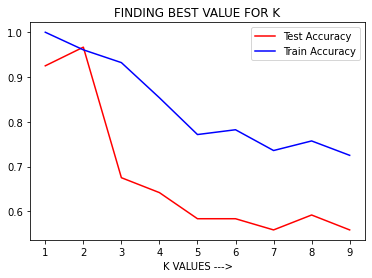

In [ ]:
p = list(range(1, 10))
lst_test =[]
lst_train =[]
for i in p:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(bowTrain, y_train)
    z = knn.score(bowTest, y_act)
    t = knn.score(bowTrain, y_train)
    lst_test.append(z)
    lst_train.append(t)
      
plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
plt.plot(p, lst_train, color ='b', label ='Train Accuracy')
plt.xlabel('K VALUES --->')
plt.title('FINDING BEST VALUE FOR K')
plt.legend()

#### Model Tunning

##### Feature Reduction

###### Select From Model

In [ ]:
feature_select = SelectFromModel(lr, prefit=True)
x_mdltrain = feature_select.transform(bow_cvtrain)
x_mdltrain.shape

(400, 347)

In [ ]:
mask = feature_select.get_support()
mdlfeat = []
for bool, feature in zip(mask, bowVect.get_feature_names()):
    if bool :
        mdlfeat.append(feature)

LR Train    0.986667
LR Test     0.867500
dtype: float64

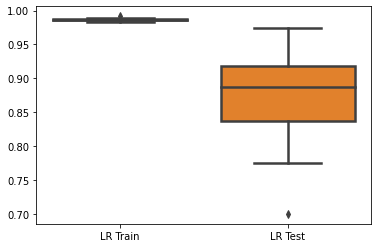

In [ ]:
# Coba data baru
score_dt = cross_validate(lr, x_mdltrain, y_cvtrain, scoring='accuracy', cv=10, return_train_score= True)
column = {'LR Train': score_dt['train_score'], 'LR Test': score_dt['test_score']}
df = pd.DataFrame(data=column)
plot = sns.boxplot(data = df, linewidth=2.5)
df.mean()

##### Hyper Parameter Tuning

In [ ]:
# Mendefinisikan fungsi untuk melakukan tunning dengan Grid Search Cross Validation
def tuning( x , y , model , params , cv=10 ,verbose=10 ):
    clf = GridSearchCV(estimator= model,
                       param_grid= params,
                       scoring= 'f1_macro',
                       cv= cv,                         
                       verbose= verbose, return_train_score=True,
                       n_jobs= -1)
    
    clf.fit( x , y )
    return clf.best_params_ , clf.best_score_, clf.cv_results_

In [ ]:
# Tunning max depth
# Mendefinisikan parameter untuk tunning
params =  {"max_depth": range(1,100,2)}

# Menemukan hyperparameters terbaik
best_params , best_score, cv_result = tuning(bow_cvtrain,
                                        y_cvtrain,
                                        DecisionTreeClassifier(),
                                        params,
                                        cv=10,
                                        verbose=2)


print(" Best Parameters:",best_params,"with score of:",best_score)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.1s


 Best Parameters: {'max_depth': 3} with score of: 0.851437096583609


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.4s finished


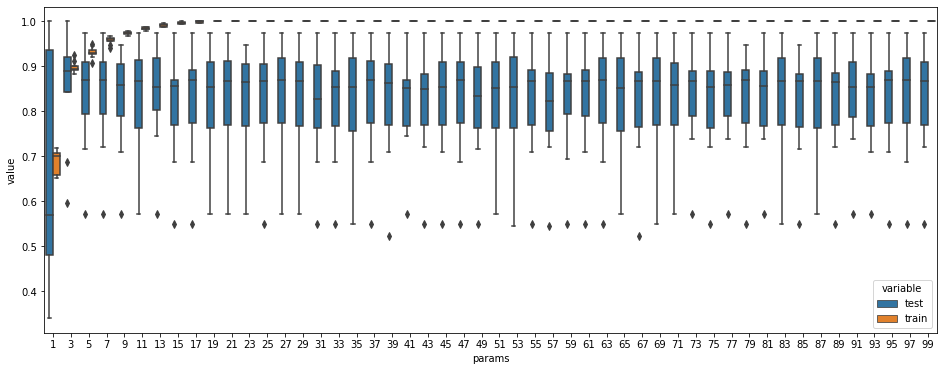

In [ ]:
result = cv_result
grid_result = {"params":[d['max_depth'] for d in result['params']]}
for key, value in result.items():
    if key.find('split') >= 0 :
        grid_result[key] = value
    
plt.figure(figsize=(16, 6))
grids = pd.DataFrame(grid_result).melt(id_vars='params')
grids['variable'] = grids.variable.str[7:-6]
sns.boxplot(data=grids, x='params', y='value', hue='variable')